In [1]:
#Cria sessão Spark
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
import pyspark.sql.functions as F
import pandas as pd
from pyspark.sql.functions import udf
from pyspark.sql.types import StringType



In [2]:
#Instância Spark
spark = SparkSession.builder.appName('Curso Pyspark') \
         .config('spark.sql.repl.eagerEval.enabled', True) \
         .getOrCreate()      

In [3]:
# lendo um arquivo parquet
df = spark.read.parquet('./DATASETS/LOGINS.parquet')

In [4]:
df

cpf,email,senha,data_de_nascimento,estado,data_cadastro,ipv4,cor_favorita,profissao,telefone
981.507.362-12,pedro-lucas53@gma...,+7^7E%xFBc,2006-12-18,RR,2023-02-26,99.107.250.210,Roxo,Jogador De Golfe,31 7785-4046
493.705.168-75,rezendeisaac@hotm...,_O_2GRnGOe,1992-06-17,GO,2023-02-16,197.11.26.213,Ciano,Atleta De Arremes...,(031) 0803-6753
398.471.625-73,felipepires@uol.c...,*Aw5EOAvy9,1921-11-11,MG,2023-01-02,181.90.63.58,Azul,Papiloscopista,11 9674-0553
092.618.354-06,stellamoraes@bol....,mw0AWYAs#s,2021-06-01,AC,2023-01-08,26.121.127.94,Marrom,Aeromoça,+55 (071) 3033 9177
509.427.136-99,wcarvalho@ig.com.br,pGD%!2Pq5X,1969-10-28,AP,2023-02-14,76.184.52.163,Laranja,Fonoaudiólogo,+55 (071) 6272 2468
218.795.460-94,da-conceicaodavi-...,uhBbFxPA&9,1986-05-19,MG,2023-03-07,192.93.0.24,Rosa,Taxista,+55 84 0652 9691
715.836.940-48,efreitas@bol.com.br,s#q9VZt&xl,2018-04-20,MG,2023-01-13,76.251.188.148,Branco,Produtor De Audio...,+55 (084) 1363 0052
475.698.032-56,wnunes@bol.com.br,_8az1W%n7g,1996-05-12,SE,2023-02-04,139.196.176.154,Azul,Cadeirinha,(071) 1640-3388
217.639.540-99,jribeiro@bol.com.br,MEf1X7fj_0,2021-10-05,PA,2023-03-02,71.22.224.5,Marrom,Geólogo,21 1432 4092
261.938.750-77,murilo05@gmail.com,Te&gO7GkKs,1917-01-05,MT,2023-02-21,136.54.123.165,Marrom,Técnico De Som,+55 (084) 5878-3346


In [17]:
# @udf(returnType=StringType())
@udf(returnType='ARRAY<STRING>')
def nome_estado(sigla):
    if sigla == 'SP':
        return ['São Paulo', 'Sudeste']
    elif sigla == 'RJ':
        return ['Rio de Janeiro', 'Sudeste']
    elif sigla == 'MG':
        return ['Minas Gerais', 'Sudeste']
    else:
        return ['Outros', 'Demais']

In [11]:
type(nome_estado)

function

In [18]:
# withColumn é uma outra formade fazer fora da funcao
df.select('estado', nome_estado('estado'))

# df.withColumn('nome_estado', F.when(df.estado == 'SP', 'Sào Paulo').when(df.estado == 'RJ', 'Rio de Janeiro').otherwise('Outros'))

estado,nome_estado(estado)
RR,"[Outros, Demais]"
GO,"[Outros, Demais]"
MG,"[Minas Gerais, Su..."
AC,"[Outros, Demais]"
AP,"[Outros, Demais]"
MG,"[Minas Gerais, Su..."
MG,"[Minas Gerais, Su..."
SE,"[Outros, Demais]"
PA,"[Outros, Demais]"
MT,"[Outros, Demais]"


In [19]:
# explodir o array em outras linhas
df.select('estado', F.explode(nome_estado('estado')))

estado,col
RR,Outros
RR,Demais
GO,Outros
GO,Demais
MG,Minas Gerais
MG,Sudeste
AC,Outros
AC,Demais
AP,Outros
AP,Demais


In [24]:
# explodiar arrya em outras colunas
df.select('estado', F.element_at(nome_estado('estado'), 1).alias('nome_estado'), F.element_at(nome_estado('estado'), 2).alias('regiao'))

estado,nome_estado,regiao
RR,Outros,Demais
GO,Outros,Demais
MG,Minas Gerais,Sudeste
AC,Outros,Demais
AP,Outros,Demais
MG,Minas Gerais,Sudeste
MG,Minas Gerais,Sudeste
SE,Outros,Demais
PA,Outros,Demais
MT,Outros,Demais


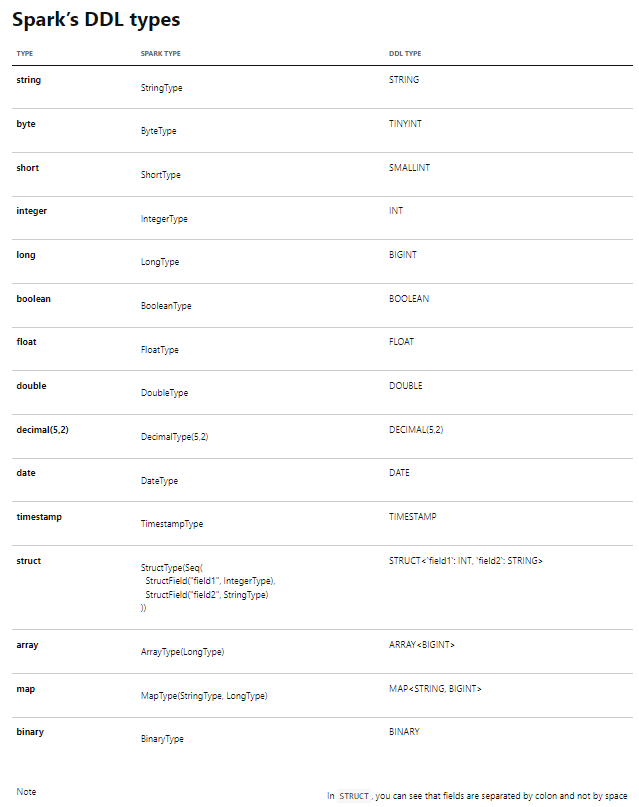

In [26]:
from IPython.display import Image
Image('./IMG/DLL Types.png')